# FFTしたときにできる雑音を窓関数で減らす

http://yukara-13.hatenablog.com/entry/2013/11/10/174244

In [1]:
from scipy import arange, hamming, sin, pi
from scipy.fftpack import fft, ifft
from matplotlib import pylab as pl

In [2]:
fs = 8000 # Sampling rate
L = 1024 # Signal length

In [3]:
# 440[Hz]のサイン波を作る。
sine_440 = sin(2. * pi * arange(L) * 440. / fs)
# 600[Hz]のサイン波を作る。
sine_600 = 2 * sin(2. * pi * arange(L) * 600. / fs)
# 800[Hz]のサイン波を作る。
sine_800 = 3 * sin(2. * pi * arange(L) * 800. / fs)

In [4]:
# 全部足す
sig = sine_440 + sine_600 + sine_800

In [5]:
# 窓関数
win = hamming(L)

In [16]:
# フーリエ変換
spectrum_nw = fft(sig) # 窓関数なし
spectrum = fft(sig * win) # 窓関数あり
half_spectrum_nw = abs(spectrum_nw[: int(L / 2 + 1)])
half_spectrum = abs(spectrum[: int(L / 2 + 1)])

In [17]:
# フーリエ逆変換
resyn_sig = ifft(spectrum)
resyn_sig /= win

/home/runa/.local/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


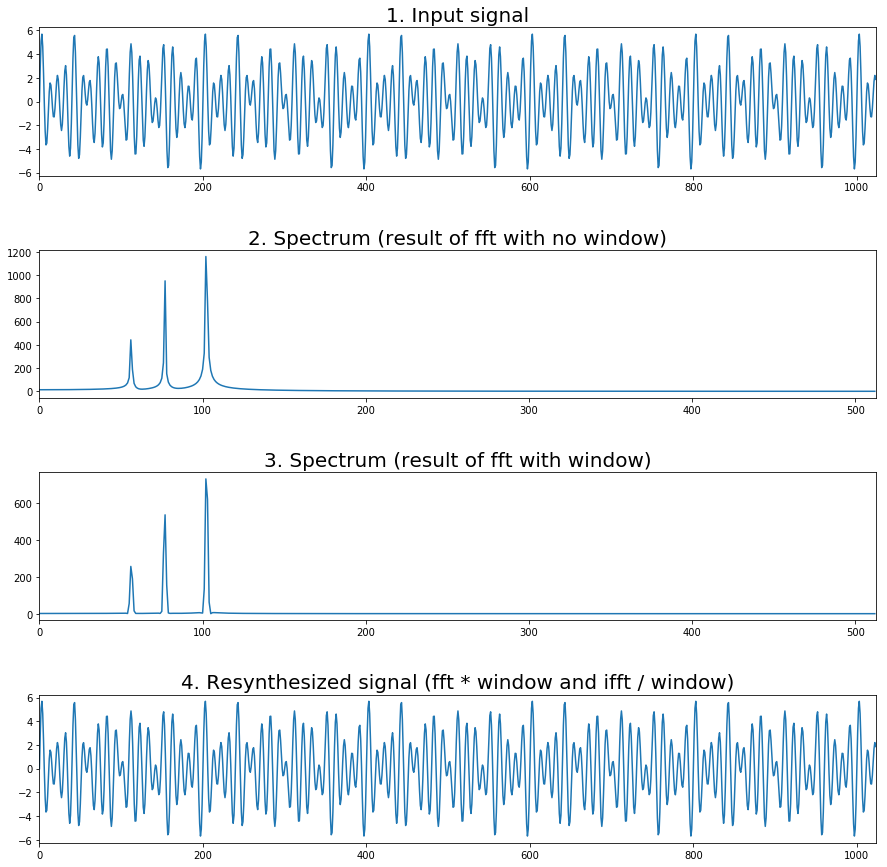

In [57]:
# 図を表示
pl.rcParams['figure.figsize'] = (15.0, 15.0)
fig = pl.figure()

fig.add_subplot(411)
pl.plot(sig)
pl.xlim([0, L])
pl.title("1. Input signal", fontsize = 20)

fig.add_subplot(412)
pl.plot(half_spectrum_nw)
pl.xlim([0, len(half_spectrum_nw)])
pl.title("2. Spectrum (result of fft with no window)", fontsize = 20)

fig.add_subplot(413)
pl.plot(half_spectrum)
pl.xlim([0, len(half_spectrum)])
pl.title("3. Spectrum (result of fft with window)", fontsize = 20)

fig.add_subplot(414)
pl.plot(resyn_sig)
pl.xlim([0, L])
pl.title("4. Resynthesized signal (fft * window and ifft / window)", fontsize = 20)

# サブプロット間の空白を詰めてみる
pl.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

pl.show()